In [37]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


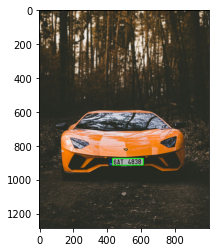

In [44]:
img=cv2.imread("test.jpg")

def recognize(img):
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))
  bfilter=cv2.bilateralFilter(gray,11,17,17)
  edged=cv2.Canny(bfilter,30,200)
  # plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))
  keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  contours=imutils.grab_contours(keypoints)
  contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]
  location=None
  for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
      location=approx
      break
  mask=np.zeros(gray.shape,np.uint8)
  new_image=cv2.drawContours(mask,[location],0,255,-1)
  new_image=cv2.bitwise_and(img,img,mask=mask)
  (x,y)=np.where(mask==255)
  (x1,y1)=(np.min(x),np.min(y))
  (x2,y2)=(np.max(x),np.max(y))
  cropped_image=gray[x1:x2+1,y1:y2+1]
  res=cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
  plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))


recognize(img)
